In [ ]:
%matplotlib inline


# t-SNE: The effect of various perplexity values on the shape

An illustration of t-SNE on the two concentric circles and the S-curve
datasets for different perplexity values.

We observe a tendency towards clearer shapes as the perplexity value increases.

The size, the distance and the shape of clusters may vary upon initialization,
perplexity values and does not always convey a meaning.

As shown below, t-SNE for higher perplexities finds meaningful topology of
two concentric circles, however the size and the distance of the circles varies
slightly from the original. Contrary to the two circles dataset, the shapes
visually diverge from S-curve topology on the S-curve dataset even for
larger perplexity values.

For further details, "How to Use t-SNE Effectively"
https://distill.pub/2016/misread-tsne/ provides a good discussion of the
effects of various parameters, as well as interactive plots to explore
those effects.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install webcolors==1.3
!pip install adjustText

  Created wheel for webcolors: filename=webcolors-1.3-py3-none-any.whl size=13039 sha256=53a39af3ed0960b2e284f8346a50238dd6601497c092878f111174fe20939aa7
  Stored in directory: /root/.cache/pip/wheels/49/2e/e7/5078ca745677e53dae9856cf41c114b7b91ada9d5f4d1a8d54
Successfully built webcolors
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=3a7f138fead8aac87429852e56c9edd49f1eb52f85643089fd4ded284d303429
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
import pandas as pd
from webcolors import rgb_to_name
from adjustText import adjust_text

'''strToComp = ['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Annoyed', 'Aroused', 'Ashamed', 'Astonished', 'Attraction', 'Calm', 'Compassionate', 'Contemplative', 'Contented', 'Convinced',
       'Delighted', 'Depressed', 'Despondent', 'Disgust', 'Dissatisfied', 'Distress', 'Distrustful', 'Droopy', 'Enthusiastic', 'Excited', 'Frustrated', 'Gloomy', 'Happy', 'Hate', 'Hopeful', 'Impatient',
       'Indignant', 'Joyous', 'Love', 'Lust', 'Melancholic', 'Miserable', 'Passionate', 'Peaceful', 'Pensive', 'Pleased', 'Relaxed', 'Sad',
       'Startled', 'Taken Aback', 'Tense', 'Tired', 'Triumphant']'''

strToComp = ['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Aroused', 'Calm', 
 'Disgust', 'Distress', 'Enthusiastic', 'Excited', 'Happy', 'Joyous', 'Love', 
 'Melancholic', 'Miserable', 'Peaceful', 'Pensive', 'Sad']

NotHappy = ['Best_Of_Amitabh_Bachchan_Scenes', 'Brothers_9_10_Movie_CLIP_Sam_Loses', 'Butterfly', 'Carving_A_Giant', 'Darkest_Things', 'Corporate_Cannibal', 'Loneliness', 
            'Hobbeling_scene', 'My_Funeral_', 'Procrastination', 'Beautiful', 'The_One_I_Once_Was', 'The_Champ_1979', 'Titanic_2012_Sinking', 'hate_lbs', 'hopeful2', 'pursuit_of_happyness']

'''colorList = np.array(['black', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro', 'whitesmoke', 
                      'white', 'snow', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'mistyrose', 'salmon', 
                      'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 
                      'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin',
                      'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki', 'palegoldenrod', 
                      'darkkhaki', 'ivory', 'beige', 'lightyellow', 'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 
                      'greenyellow', 'chartreuse', 'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen',
                      'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mintcream', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 
                      'turquoise', 'lightseagreen', 'mediumturquoise', 'azure', 'lightcyan', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 
                      'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 
                      'aliceblue', 'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 
                      'ghostwhite', 'lavender', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 
                      'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 
                      'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush', 'palevioletred', 'crimson', 'pink', 
                      'lightpink'])'''

## Create an array of all the color names and then randomly pick some from them.
colorList = np.array(['black', 'dimgray','silver', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon',  'tomato', 
                      'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'chocolate', 'saddlebrown', 'sandybrown','peru', 'darkorange', 'burlywood', 
                      'tan', 'navajowhite', 'orange', 'wheat', 'darkgoldenrod', 'goldenrod', 'gold', 'khaki','darkkhaki', 'olive', 'yellow', 'olivedrab', 
                      'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 
                      'limegreen', 'darkgreen','green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 
                      'turquoise', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 
                      'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 
                      'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 
                      'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 
                      'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 
                      'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'palevioletred', 'crimson', 'pink', 
                      'lightpink'])
rgbDict = {}
for col in colorList:
    rgbDict[col] = matplotlib.colors.to_rgb(col)

import random
strToCompDict = {}
colorCode = {}    
random.shuffle(colorList)
for indxx, _emt in enumerate(strToComp):
    randColor = colorList[indxx]
    strToCompDict[_emt] = randColor
    colorCode[randColor] = indxx

markers = {}
for indxx, _emt in enumerate(strToComp):
    markers[_emt] = '$%s$' %str(indxx)

'''
strToComp = ['Afraid', 'Distress', 'Amused', 'Disgust', 'Miserable', 'Enthusiastic', 'Aroused', 'Adventurous', 'Triumphant', 'Happy',
            'Joyous', 'Ashamed', 'Angry', 'Droopy', 'Sad', 'Calm', 'Love', 'Melancholic', 'Alarmed']

#NotHappy = ['Best_Of_Amitabh_Bachchan_Scenes', 'Brothers_9_10_Movie_CLIP_Sam_Loses', 'Butterfly', 'Carving_A_Giant', 'Darkest_Things', 'Corporate_Cannibal', 'Loneliness', 
#            'Hobbeling_scene', 'My_Funeral_', 'Procrastination', 'Beautiful', 'The_One_I_Once_Was', 'The_Champ_1979', 'Titanic_2012_Sinking', 'hate_lbs', 'hopeful2', 'pursuit_of_happyness']

NotHappy = ['Best_Of_Amitabh_Bachchan_Scenes', 'Brothers_9_10_Movie_CLIP_Sam_Loses', 'Butterfly', 'Carving_A_Giant', 'Darkest_Things', 'Corporate_Cannibal', 'Loneliness', 
            'Hobbeling_scene', 'My_Funeral_', 'Procrastination', 'Beautiful', 'The_One_I_Once_Was', 'The_Champ_1979', 'Titanic_2012_Sinking', 'hate_lbs', 'hopeful2', 'pursuit_of_happyness',
            'Madari_movie_of_best_scene', 'Milkha_Visits_His_Village', 'The_Weight_Of_My_Words']

strToCompDict = {'Afraid':'rosybrown', 'Distress':'lightcoral', 'Amused':'indianred', 'Disgust':'darkred', 'Miserable':'mistyrose', 
                 'Enthusiastic':'salmon', 'Aroused':'orangered', 'Adventurous':'sienna', 'Triumphant':'chocolate', 'Happy':'peru', 
                 'Joyous':'tan', 'Ashamed':'blanchedalmond', 'Angry':'wheat', 'Droopy':'darkgoldenrod', 'Sad':'gold', 'Calm':'khaki', 
                 'Love':'olive', 'Melancholic':'black', 'Alarmed':'greenyellow'}

colorCode = {'rosybrown':0, 'lightcoral':1, 'indianred':2, 'darkred':3, 'mistyrose':4, 'salmon':5, 'orangered':6, 'sienna':7, 'chocolate':8, 
             'peru':9, 'tan':10, 'blanchedalmond':11, 'wheat':12, 'darkgoldenrod':13, 'gold':14, 'khaki':15, 'olive':16, 'black':17, 'greenyellow':18}

strToCompQuad = {'Afraid':'LVHA', 'Distress':'LVHA', 'Amused':'HVHA', 'Disgust':'LVHA', 'Miserable':'LVLA', 
                 'Enthusiastic':'HVHA', 'Aroused':'HVHA', 'Adventurous':'HVHA', 'Triumphant':'HVHA', 'Happy':'HVHA', 
                 'Joyous':'HVHA', 'Ashamed':'LVLA', 'Angry':'LVHA', 'Droopy':'LVLA', 'Sad':'LVLA', 'Calm':'HVLA', 
                 'Love':'HVLA', 'Melancholic':'LVLA', 'Alarmed':'LVHA'}




markers = {'Afraid':'$a$', 'Distress':'$b$', 'Amused':'$c$', 'Disgust':'$d$', 'Miserable':'$e$', 
                 'Enthusiastic':'$f$', 'Aroused':'$g$', 'Adventurous':'$h$', 'Triumphant':'$i$', 'Happy':'$j$', 
                 'Joyous':'$k$', 'Ashamed':'$l$', 'Angry':'$m$', 'Droopy':'$n$', 'Sad':'$o$', 'Calm':'$p$', 
                 'Love':'$q$', 'Melancholic':'$r$', 'Alarmed':'$s$'}'''




'''rosybrown, lightcoral, indianred, darkred, mistyrose, salmon, orangered, sienna, chocolate, peru, tan, blanchedalmond, wheat, darkgoldenrod,
gold, khaki, olive, yellow, greenyellow, lime'''

data = pd.read_csv('/content/drive/MyDrive/BRM/My_Experiment_Ratings_after_cleaning2018_Oct_10-Nov_15.csv', index_col=0)
data = data.replace(['Adventorous'],'Adventurous')    
print(data)
print(len(data))
print(data.columns.values)
print(markers)

Automatically created module for IPython interactive environment
                                          Experiment_id  ...  Gender
0              Final_Race_of_Milkha_Singh_Career_[360p]  ...    Male
1            Train_To_Busan_Ending_SAD_scene_4K_Quality  ...    Male
2                                           loveNashe_1  ...    Male
3                                         FunAlaBarfi_1  ...    Male
4                                    excitingMohabbat_1  ...    Male
...                                                 ...  ...     ...
5978                                             I_Hate  ...    Male
5979          Wraith_Pinned_To_The_Mist_And_Other_Games  ...    Male
5980  Haasil_Movie_Dialogues_and_Scenes_Collection_-...  ...    Male
5981                                       Nicest_Thing  ...    Male
5982                              Bittersweet_Symphony_  ...    Male

[5983 rows x 12 columns]
5983
['Experiment_id' 'trial_serial' 'trial_index' 'Valence' 'Arousal'
 'Dominanc

In [ ]:
import pdb
indexWithoutEmt = []
DeletedEmotionAre = []

for index, emt_ in zip(data.index.values, data['Emotion_Name']):
    flag = 0
    if not isinstance(emt_, str):
        indexWithoutEmt.extend([index])
    elif 'Without Categorization' in emt_:
        indexWithoutEmt.extend([index])
    else:
        #data.loc[index, 'Emotion_Name'] = str_
        if emt_ in strToComp:
            data.loc[index, 'Color'] = strToCompDict[emt_]
        else:
            indexWithoutEmt.extend([index])
            DeletedEmotionAre.extend([emt_])

    '''if isinstance(emt_, str):
        for str_ in strToComp:
            if str_.lower() in emt_.lower():            
            #if str_ in emt_:
                nhFlag = 0
                if emt_ == 'Happy' or emt_ == 'happy': 
                    #if 'Best_Of_Amitabh_Bachchan_Scenes' in '_'.join(data.loc[index, 'Experiment_id'].split(' ')):
                    #    pdb.set_trace()                                            
                    for nh in NotHappy:                        
                        if nh in '_'.join(data.loc[index, 'Experiment_id'].split(' ')):
                            print(data.loc[index,:])
                            nhFlag = 1
                            break

                if nhFlag == 0:                                            
                    data.loc[index, 'Emotion_Name'] = str_
                    try:
                        data.loc[index, 'Color'] = strToCompDict[str_]
                    except:
                        pdb.set_trace()

                    if strToCompQuad[str_] == data.loc[index, 'Quadrant']:
                        flag = 1

    if flag == 0:
        indexWithoutEmt.extend([index])'''

print(data['Emotion_Name'])
print(indexWithoutEmt)
print(len(indexWithoutEmt))
NewData = data.drop(indexWithoutEmt, axis=0, inplace=False)
NewData.reset_index(drop=True, inplace=True)
print(NewData['Emotion_Name'])
print(NewData)
NewData.to_csv('/content/drive/MyDrive/BRM/newData.csv')

0                       Joyous
1                   Despondent
2                       Amused
3                 Enthusiastic
4                    Delighted
                 ...          
5978    Without Categorization
5979    Without Categorization
5980    Without Categorization
5981    Without Categorization
5982    Without Categorization
Name: Emotion_Name, Length: 5983, dtype: object
[1, 4, 5, 6, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,

# **Creating Data for t-SNE**

In [ ]:
print(NewData.keys())
print(np.unique(NewData['Emotion_Name']))

Index(['Experiment_id', 'trial_serial', 'trial_index', 'Valence', 'Arousal',
       'Dominance', 'Liking', 'Familiarity', 'Emotion_Name', 'Participant_id',
       'Quadrant', 'Gender', 'Color'],
      dtype='object')
['Adventurous' 'Afraid' 'Alarmed' 'Amused' 'Angry' 'Aroused' 'Calm'
 'Disgust' 'Distress' 'Enthusiastic' 'Excited' 'Happy' 'Joyous' 'Love'
 'Melancholic' 'Miserable' 'Peaceful' 'Pensive' 'Sad']


In [ ]:
import pdb
anotherData = NewData.set_index('Experiment_id', drop=True, inplace=False)
colmsAre = np.unique(anotherData['Emotion_Name']).tolist()
colmsAre.extend(['target'])
uniqStimAre = []
for stim_ in np.unique(anotherData.index.values):
    if (stim_ == 'disgust') or (stim_=='loveNashe_1'):
        print(index)
        continue
    uniqStimAre.extend([stim_]) 

print(uniqStimAre)

DimData = pd.DataFrame(0, index=uniqStimAre, columns=colmsAre)
ColorData = pd.DataFrame(0, index=uniqStimAre, columns=['Color', 'ColorCode', 'marker'])

for index, emt_ in zip(anotherData.index.values, anotherData['Emotion_Name']): 
    if (index == 'disgust') or (index=='loveNashe_1'):
        print(index)
        continue           
    DimData.loc[index, emt_] = DimData.loc[index, emt_]+1
    emtName = DimData.columns.values[np.argmax(DimData.loc[index, :][:-1])] ## Stimuli emotion name
    DimData.loc[index, 'target'] = emtName
    ColorData.loc[index, 'Color'] = strToCompDict[emtName]
    ColorData.loc[index, 'ColorCode'] = colorCode[strToCompDict[emtName]]
    ColorData.loc[index, 'marker'] = markers[emtName]

DimData = pd.concat((DimData, ColorData),axis=1)
print(DimData)
print(len(DimData))
DimData.to_csv('/content/drive/MyDrive/BRM/DimData.csv')

5982
5982
['Air_Supply_All_Out_Of_Love', 'Anacondas_The_Hunt_for_the_Blood_Orchid_clip', 'Anger', 'Anger_LBS', 'Anger_LBS_2', 'Arshad_Warsi_Bollywood_Comedy_[360p]', 'Best_Horror_Kills_Ghost_Ship_Opening_scene', 'Best_Of_Amitabh_Bachchan_Scenes_from_Sarkar_{2005}_-_Abhishek_Bachchan_-_Best_Action_Movie_[360p]', 'Blood_and_Bone_prison_fight', 'Breakdown', 'Brothers_9_10_Movie_CLIP_Sam_Loses_It_2009_HD', 'Bullet_With_Butterfly_Wings', 'Butterfly_Nets', 'Carving_A_Giant', 'Catwoman_Basketball_Scene', 'Corporate_Cannibal', 'Crash_Saddest_scene', 'Darkest_Things', 'Divergent_Kiss_scene_clip', 'Easy', 'FURY_Tiger_Ambush', 'Fast_Furious_7_Plane_Scene', 'Final_Race_of_Milkha_Singh_Career_[360p]', 'First_Day_Of_My_Life', 'Fuck_You', 'FunAlaBarfi_1', 'Gravity_Detached_HD', 'House_3_1989_UNRATED_Electric_Chair_Scene', 'How_To_Fight_Loneliness', 'I_m_Yours', 'Jai_Ho', 'Lage_Raho_Munnabhai_Only_the_Funny_Scenes_[360p]', 'Lage_Raho_Munnabhai_Only_the_Funny_Scenes_[360p]_2', 'Loba', 'MASOOM', 'Madari

In [ ]:
print(len(np.unique(anotherData.index.values)))
print(colmsAre)
print(DimData)
print(ColorData)
print(np.unique(DimData['target']))
print(np.unique(ColorData['ColorCode']))
print(np.unique(ColorData['Color']))
print(np.unique(ColorData['marker']))

71
['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Aroused', 'Calm', 'Disgust', 'Distress', 'Enthusiastic', 'Excited', 'Happy', 'Joyous', 'Love', 'Melancholic', 'Miserable', 'Peaceful', 'Pensive', 'Sad', 'target']
                                              Adventurous  ...  marker
Air_Supply_All_Out_Of_Love                              0  ...    $11$
Anacondas_The_Hunt_for_the_Blood_Orchid_clip            0  ...     $2$
Anger                                                   2  ...     $0$
Anger_LBS                                               0  ...     $8$
Anger_LBS_2                                             0  ...     $4$
...                                                   ...  ...     ...
hopeful2                                                1  ...    $15$
horror                                                  1  ...     $2$
joyKolaveri_1                                           0  ...    $11$
peaceful2                                               0  ...    $

# **Creating Co-Loading Matrix**

              Adventurous  Afraid  Alarmed  ...  Peaceful  Pensive  Sad
Adventurous             5       0        1  ...         0        0    0
Afraid                  0       9        6  ...         0        2    2
Alarmed                 1       6       15  ...         0        1    1
Amused                  0       0        0  ...         0        0    0
Angry                   0       1        2  ...         0        1    1
Aroused                 0       0        0  ...         1        0    0
Calm                    0       0        0  ...         1        2    0
Disgust                 0       0        1  ...         0        0    0
Distress                0       0        1  ...         0        0    2
Enthusiastic            2       0        0  ...         1        0    0
Excited                 3       0        1  ...         0        0    0
Happy                   2       0        0  ...         3        3    0
Joyous                  1       0        0  ...         1       

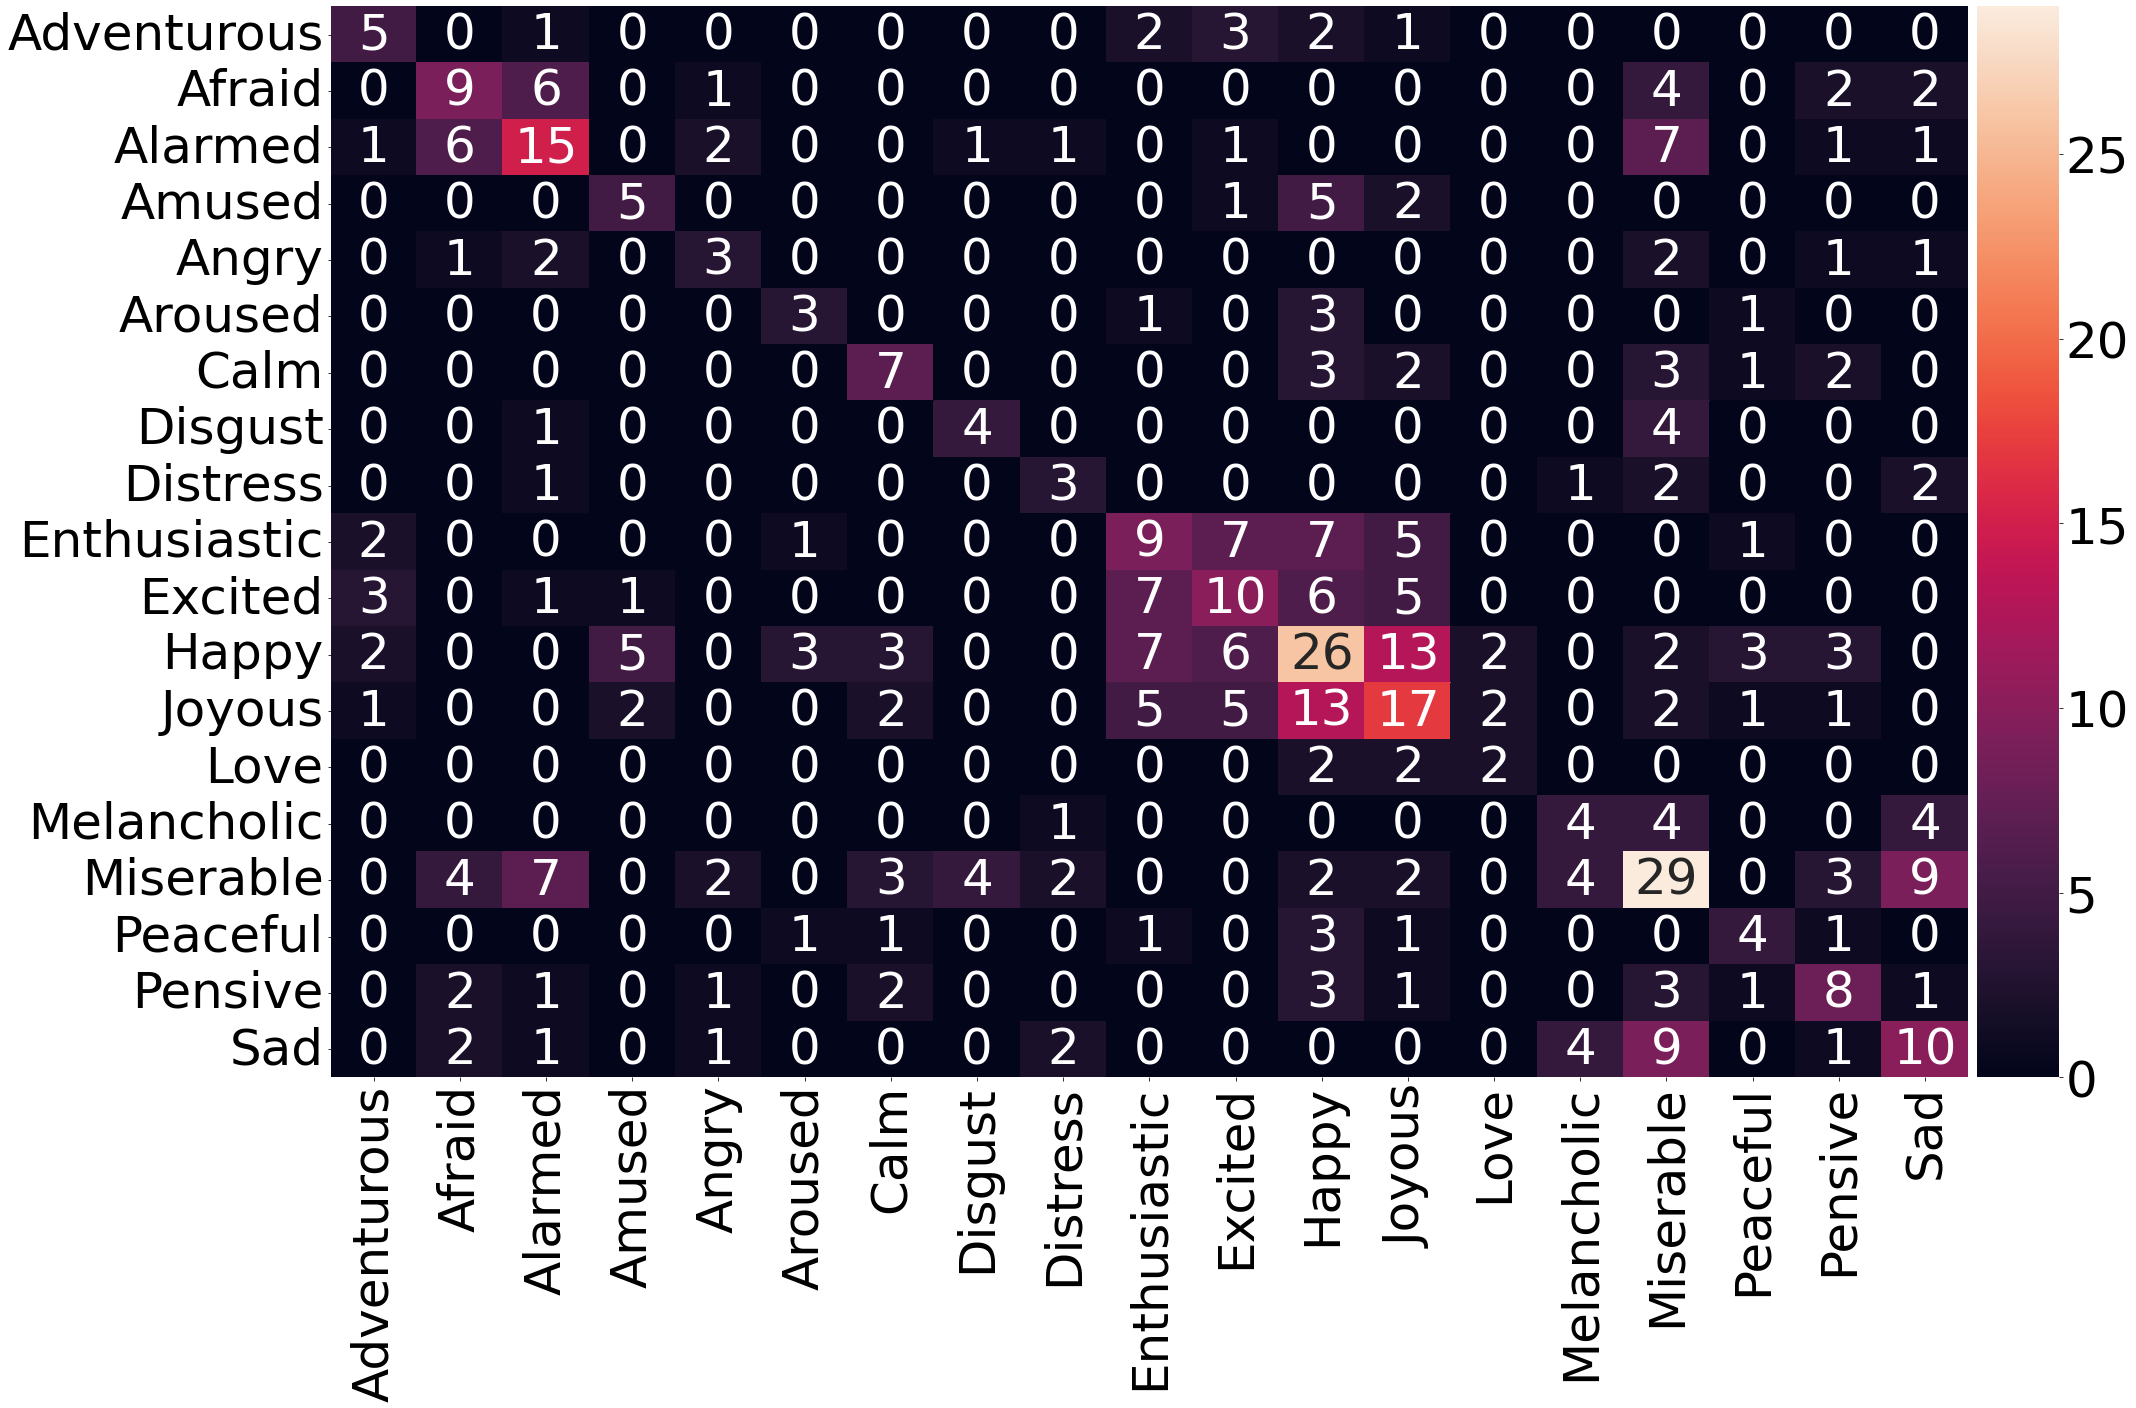

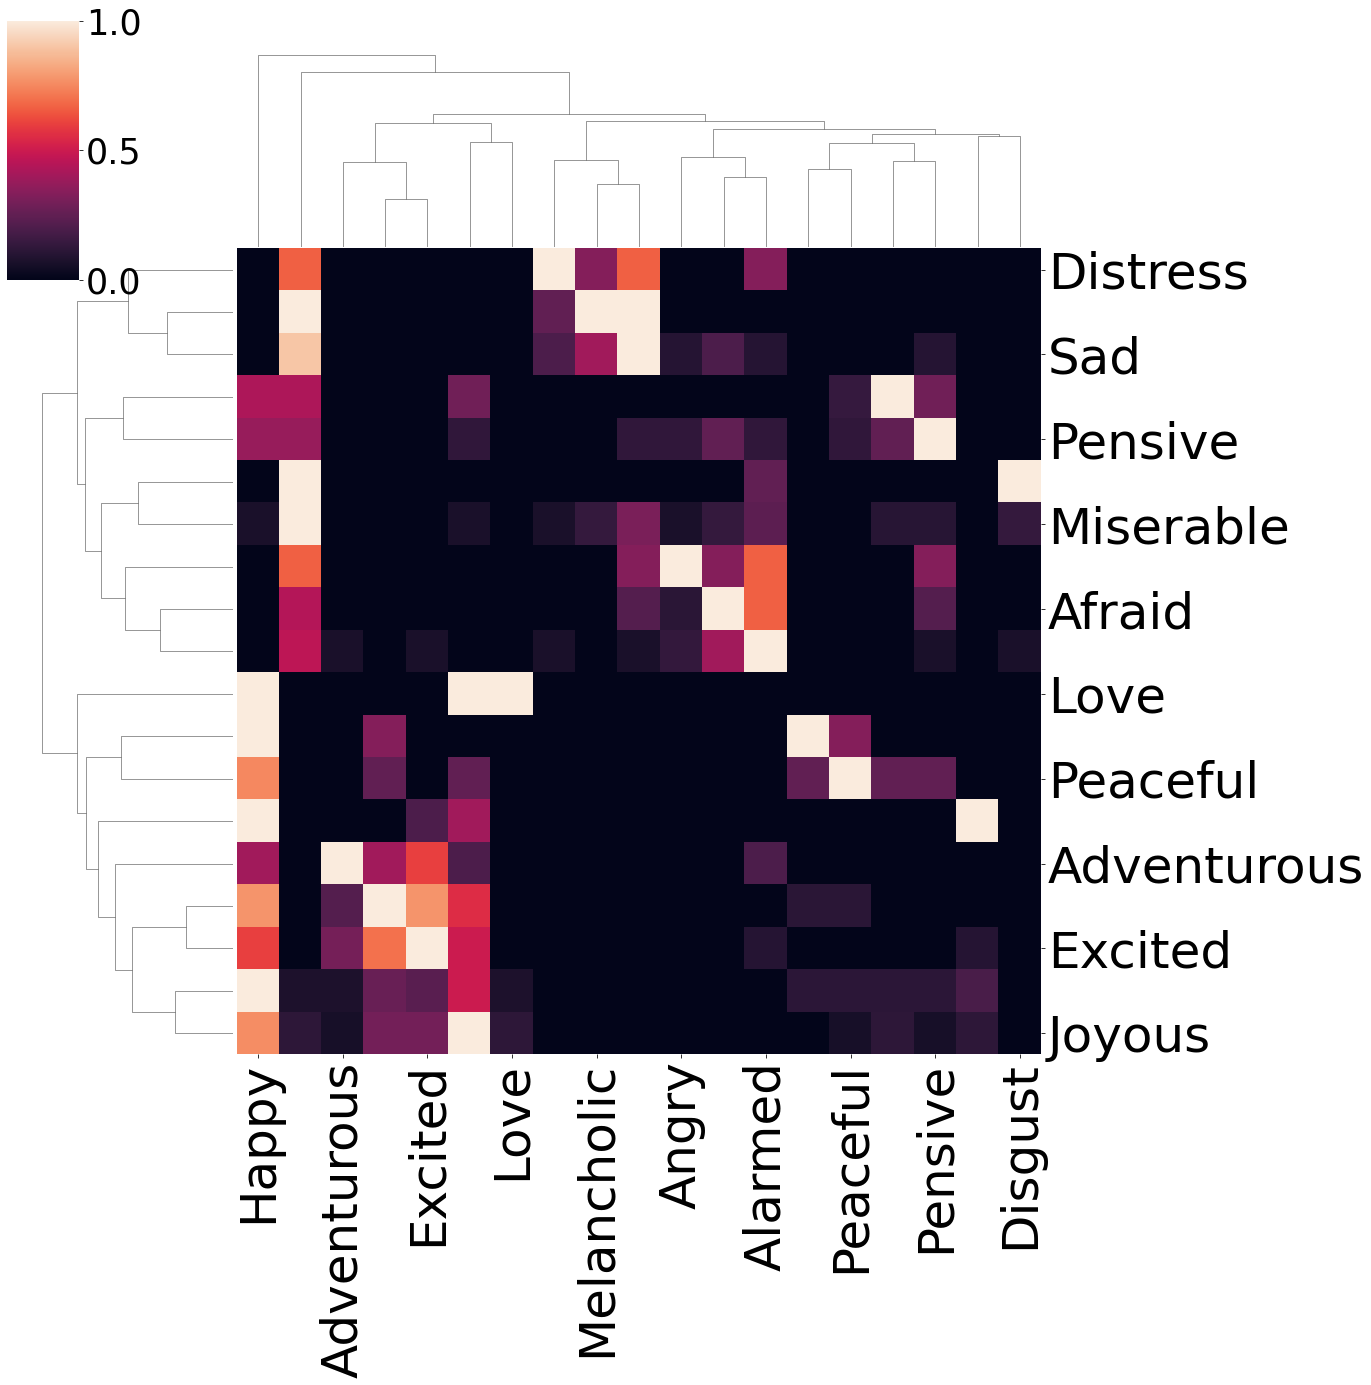

In [ ]:
import seaborn as sns
from matplotlib import gridspec

CoLoadingFrame = pd.DataFrame(0, index=colmsAre[:-1], columns=colmsAre[:-1])
colmsAre = np.array(colmsAre)

for index in DimData.index.values:
    thrs = int(np.round(np.sum(DimData.loc[index,colmsAre[:-1]].values)/10,0))
    coOccuredEmt = colmsAre[:-1][(DimData.loc[index,colmsAre[:-1]]>thrs).values]
    for emt_1 in coOccuredEmt:        
        for emt_2 in coOccuredEmt:                              
            CoLoadingFrame.loc[emt_1, emt_2] = CoLoadingFrame.loc[emt_1, emt_2]+1
        #print(CoLoadingFrame.loc[emt_1,:])

print(CoLoadingFrame)
CoLoadingFrame.to_csv('/content/drive/MyDrive/BRM/CoLoadingFrame.csv')

plt.figure(figsize=(30,20))
plt.rcParams['font.size']=50
nRows = 2
nCols = 2
gs = gridspec.GridSpec(nRows, nCols, height_ratios=[20,1], width_ratios=[20,1], hspace=0.1, wspace=0.01, left=0.15, right=0.95, bottom=0.15, top=0.97)

ax=plt.subplot(gs[0, 0])
cbarax=plt.subplot(gs[0, 1])
sns.heatmap(CoLoadingFrame, annot=True, fmt='', ax=ax, cbar_ax=cbarax)
plt.savefig('/content/drive/MyDrive/BRM/HeatMap.png')
plt.savefig('/content/drive/MyDrive/BRM/HeatMap.pdf')

maxValues = np.max(CoLoadingFrame, axis=0)
for index in CoLoadingFrame.index.values:
    CoLoadingFrame.loc[index,:] = CoLoadingFrame.loc[index,:]/maxValues.loc[index] 

sns.clustermap(CoLoadingFrame, figsize=(20,20))
plt.tick_params(labelsize=35)
plt.savefig('/content/drive/MyDrive/BRM/ClusterMap.png')
plt.savefig('/content/drive/MyDrive/BRM/ClusterMap.pdf')


# **Creating Gradient Colors**

In [ ]:
from scipy.spatial import KDTree
from webcolors import (
    css3_hex_to_names,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []    
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)    
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]
    #return f'closest match: {names[index]}'

#source: https://medium.com/codex/rgb-to-color-names-in-python-the-robust-way-ec4a9d97a01f

newDimData = DimData.copy()
for idx in newDimData.index.values:
    toProcess = newDimData.loc[idx, colmsAre[:-1]].values
    sum_ = np.sum(toProcess)
    print(toProcess)
    toProcess = toProcess/sum_
    newDimData.loc[idx, colmsAre[:-1]] = toProcess

    newColor = np.array([0, 0, 0])
    for clmn in colmsAre[:-1]:
        #print(clmn)
        #print(newDimData.loc[idx, clmn])
        #print(rgbDict[strToCompDict[clmn]])
####### This is the color interpolation step
        newColor = newColor+(newDimData.loc[idx, clmn]*np.array(rgbDict[strToCompDict[clmn]])) ## rgbDict has rgb values
    print(np.round(newColor*255, 0).astype(np.int))
    named_color = convert_rgb_to_names(tuple(np.round(newColor*255, 0).astype(np.int)))
    newDimData.loc[idx, 'Color'] = named_color
    print(named_color)

for stim_, mark_ in zip(newDimData.index.values, newDimData['marker']):    
    newDimData.loc[stim_, 'marker'] = "$%s$" %str(chr(97+int(mark_.split('$')[1])))
    print(newDimData.loc[stim_, 'marker'])

newDimData.to_csv('/content/drive/MyDrive/BRM/newDimData.csv')

[0 0 0 0 0 0 0 0 0 0 1 5 2 0 0 0 0 2 0]
[154 127  74]
peru
[0.0 3.0 10.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0]
[152 184  89]
darkkhaki
[2.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0
 1.0]
[124 104  87]
dimgrey
[0.0 0.0 3.0 0.0 2.0 0.0 0.0 2.0 5.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0
 3.0]
[172 174  68]
yellowgreen
[0.0 0.0 2.0 0.0 5.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 3.0 0.0 0.0
 1.0]
[141 173  62]
yellowgreen
[0.0 0.0 0.0 9.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 4.0 2.0 0.0 0.0 0.0 0.0 0.0
 0.0]
[195 198  54]
yellowgreen
[0.0 0.0 2.0 0.0 1.0 0.0 0.0 4.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 3.0 0.0 0.0
 1.0]
[175 149  72]
peru
[0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 6.0 0.0 2.0
 6.0]
[122 172 117]
darkseagreen
[1.0 2.0 5.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0]
[133 156 103]
grey
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 1.0 0.0 0.0 1.0 4.0 1.0
 0.0]
[104  93  38]
darkolivegreen
[0.0 2.0 0.

In [ ]:
print(DimData)
print(DimData.keys())
print(DimData[['Color', 'ColorCode']])

                                              Adventurous  ...  marker
Air_Supply_All_Out_Of_Love                              0  ...    $11$
Anacondas_The_Hunt_for_the_Blood_Orchid_clip            0  ...     $2$
Anger                                                   2  ...     $0$
Anger_LBS                                               0  ...     $8$
Anger_LBS_2                                             0  ...     $4$
...                                                   ...  ...     ...
hopeful2                                                1  ...    $15$
horror                                                  1  ...     $2$
joyKolaveri_1                                           0  ...    $11$
peaceful2                                               0  ...    $13$
pursuit_of_happyness_touching_scene                     0  ...    $15$

[69 rows x 23 columns]
Index(['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Aroused',
       'Calm', 'Disgust', 'Distress', 'Enthusiastic

# **Finding out the video with the highest percent to any emotion**

In [ ]:
max_ = {}
print(newDimData.keys())
for emt_ in np.unique(newDimData['target']):
    iLocs = np.where(newDimData['target'] == emt_)[0] 		## What indexes to look at
    #print(np.where(newDimData['target'] == emt_)[0])
    #print(np.argmax(newDimData[emt_]))    
    colIndx = np.where(newDimData.columns.values==emt_)[0]  ## Which column to look at
    print(emt_, newDimData.columns.values[colIndx])
    max_[iLocs[np.argmax(newDimData.iloc[iLocs, colIndx])]] = emt_ ## Now look at those indexes which are categorized as particular emotion under the same emotion column

print(max_)

Index(['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Aroused',
       'Calm', 'Disgust', 'Distress', 'Enthusiastic', 'Excited', 'Happy',
       'Joyous', 'Love', 'Melancholic', 'Miserable', 'Peaceful', 'Pensive',
       'Sad', 'target', 'Color', 'ColorCode', 'marker'],
      dtype='object')
Adventurous ['Adventurous']
Afraid ['Afraid']
Alarmed ['Alarmed']
Amused ['Amused']
Angry ['Angry']
Aroused ['Aroused']
Calm ['Calm']
Disgust ['Disgust']
Distress ['Distress']
Enthusiastic ['Enthusiastic']
Excited ['Excited']
Happy ['Happy']
Joyous ['Joyous']
Love ['Love']
Melancholic ['Melancholic']
Miserable ['Miserable']
Peaceful ['Peaceful']
Pensive ['Pensive']
Sad ['Sad']
{2: 'Adventurous', 26: 'Afraid', 1: 'Alarmed', 5: 'Amused', 4: 'Angry', 18: 'Aroused', 12: 'Calm', 6: 'Disgust', 3: 'Distress', 41: 'Enthusiastic', 14: 'Excited', 29: 'Happy', 59: 'Joyous', 57: 'Love', 16: 'Melancholic', 38: 'Miserable', 9: 'Peaceful', 46: 'Pensive', 35: 'Sad'}


In [ ]:
print(np.unique(newDimData['Color']))
print(newDimData.keys())
print(np.unique(newDimData['target']))
print(markers)
print(colmsAre[:-1])
print(newDimData[colmsAre[:-1]])
print(markers)

['cadetblue' 'darkkhaki' 'darkolivegreen' 'darkseagreen' 'darkslateblue'
 'darkslategrey' 'dimgrey' 'grey' 'lightseagreen' 'lightslategrey'
 'mediumseagreen' 'olivedrab' 'peru' 'rosybrown' 'sienna' 'slategrey'
 'yellowgreen']
Index(['Adventurous', 'Afraid', 'Alarmed', 'Amused', 'Angry', 'Aroused',
       'Calm', 'Disgust', 'Distress', 'Enthusiastic', 'Excited', 'Happy',
       'Joyous', 'Love', 'Melancholic', 'Miserable', 'Peaceful', 'Pensive',
       'Sad', 'target', 'Color', 'ColorCode', 'marker'],
      dtype='object')
['Adventurous' 'Afraid' 'Alarmed' 'Amused' 'Angry' 'Aroused' 'Calm'
 'Disgust' 'Distress' 'Enthusiastic' 'Excited' 'Happy' 'Joyous' 'Love'
 'Melancholic' 'Miserable' 'Peaceful' 'Pensive' 'Sad']
{'Adventurous': '$0$', 'Afraid': '$1$', 'Alarmed': '$2$', 'Amused': '$3$', 'Angry': '$4$', 'Aroused': '$5$', 'Calm': '$6$', 'Disgust': '$7$', 'Distress': '$8$', 'Enthusiastic': '$9$', 'Excited': '$10$', 'Happy': '$11$', 'Joyous': '$12$', 'Love': '$13$', 'Melancholic': '$14$', '

## Perform PCA on the adjacency matrix Just to cross check output with t-SNE


                                              Adventurous  ...       Sad
Air_Supply_All_Out_Of_Love                       0.000000  ...  0.000000
Anacondas_The_Hunt_for_the_Blood_Orchid_clip     0.000000  ...  0.000000
Anger                                            0.250000  ...  0.125000
Anger_LBS                                        0.000000  ...  0.166667
Anger_LBS_2                                      0.000000  ...  0.076923
...                                                   ...  ...       ...
hopeful2                                         0.111111  ...  0.000000
horror                                           0.058824  ...  0.058824
joyKolaveri_1                                    0.000000  ...  0.000000
peaceful2                                        0.000000  ...  0.000000
pursuit_of_happyness_touching_scene              0.000000  ...  0.000000

[69 rows x 19 columns]
-----------------------------------------
In max keys: [ 0.3741888 -0.091655 ]
Not in max keys: [-0.

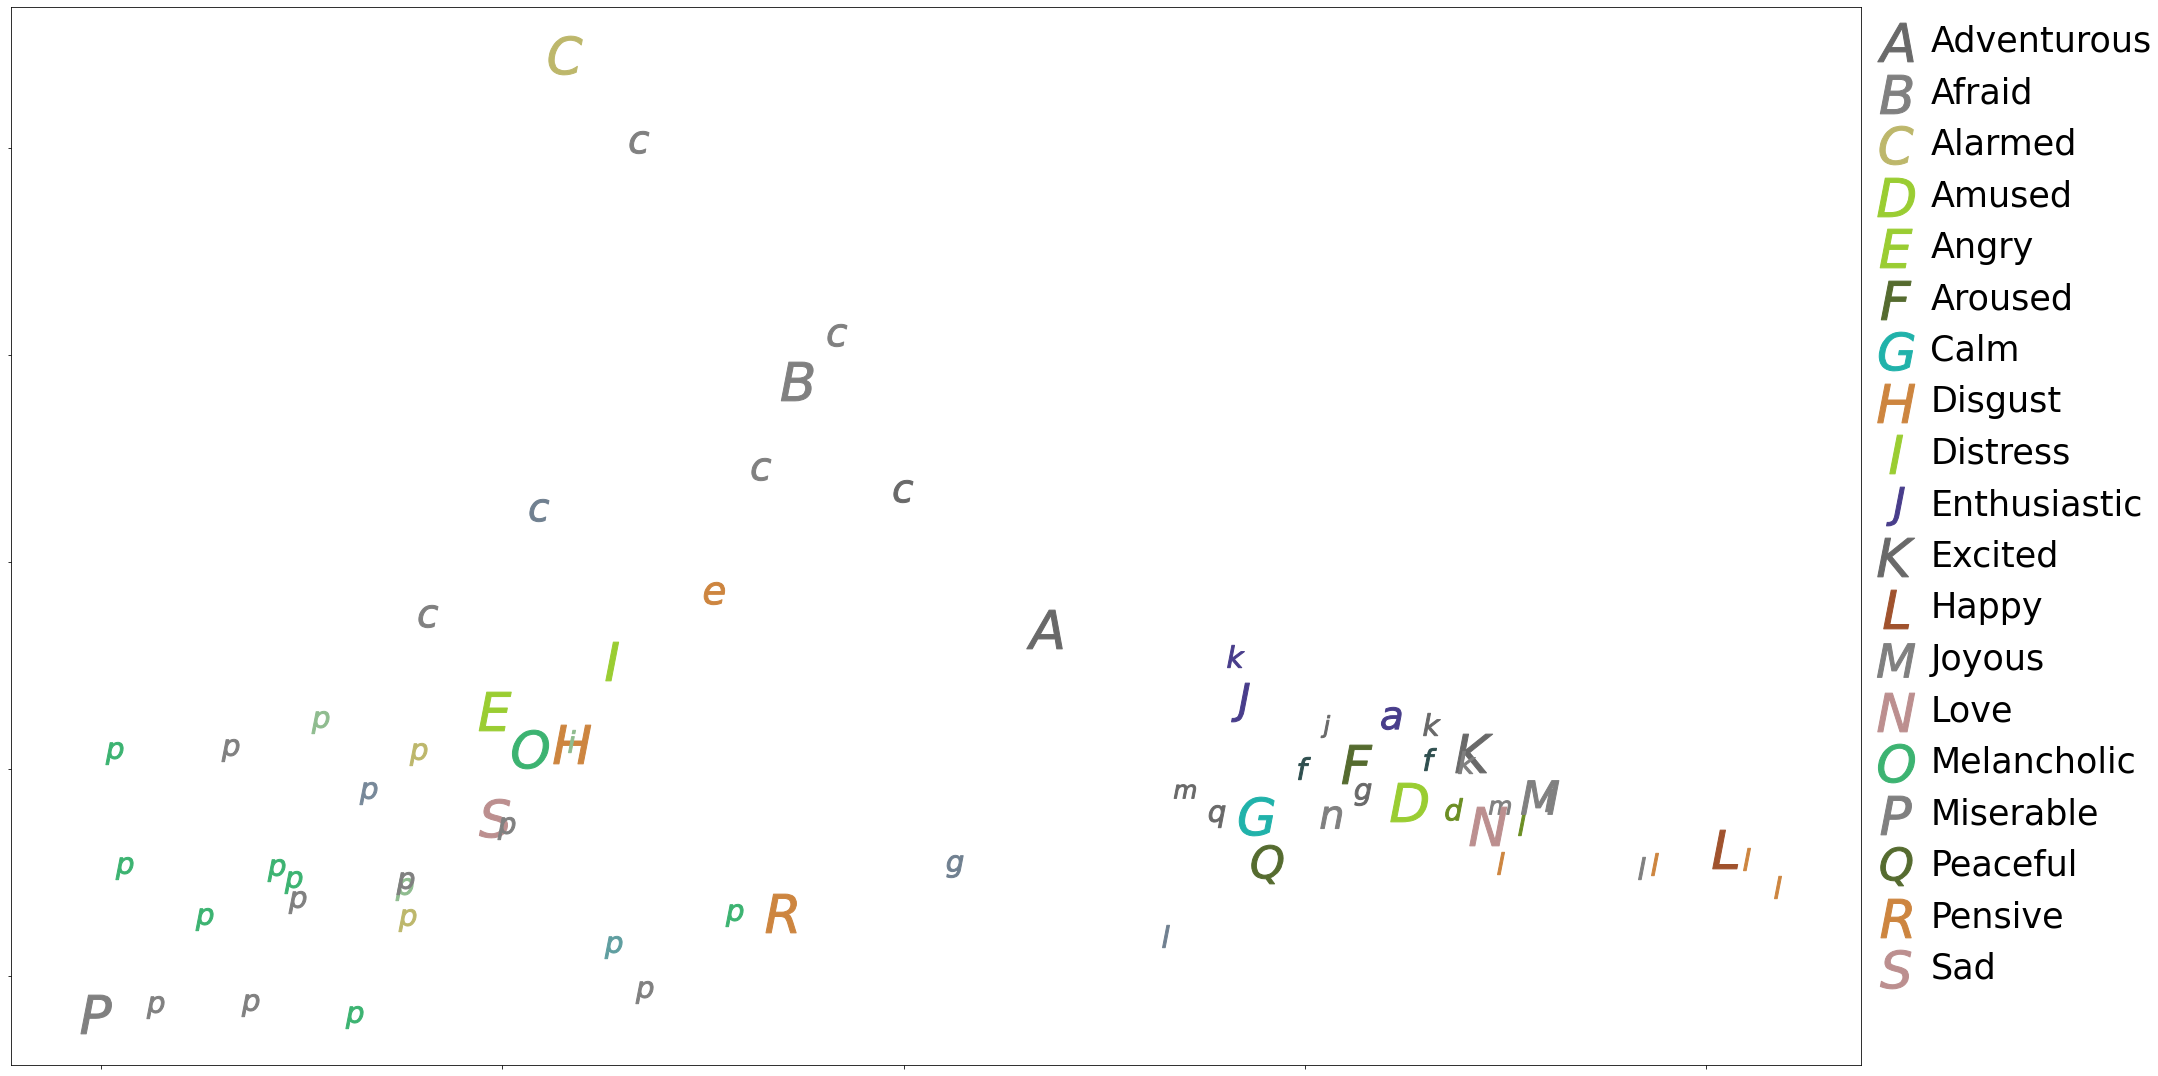

In [ ]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

#plt.figure(figsize=(45,15))
plt.figure(figsize=(30,15))
plt.rcParams['font.size']=35
perplexities = np.arange(10, 80, 5)#[65]#, 35, 40, 45]
n_iterArr = np.arange(1000, 6000, 1000)
n_compArr = np.arange(1, 4, 1)

perplexities = [65]
n_iterArr = [1000] #np.arange(1000, 6000, 1000)
n_compArr = [2]

nRows = 1
nCols = 2
#gs = gridspec.GridSpec(nRows, nCols, width_ratios=np.ones(nCols), hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)
gs = gridspec.GridSpec(nRows, nCols, width_ratios=[10, 1], hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)

n_samples = len(newDimData)
DivergenceDataFrame = pd.DataFrame(0, index=np.arange(0, 280), columns=['n_comp', 'n_iter', 'perplex', 'kl_diverg'])
indexCount = 0

print(newDimData[colmsAre[:-1]])
print('-----------------------------------------')

from sklearn.decomposition import PCA
pcaModel = PCA(n_components=2)
Y = pcaModel.fit_transform(newDimData[colmsAre[:-1]])
#print(Y)

texts = []
colorStr = []
ax=plt.subplot(gs[0, 0])
for allInd in np.arange(len(Y)):
    if allInd not in max_.keys():
        print(f'In max keys: {Y[allInd, :]}')
        ax.scatter(Y[allInd, 0], Y[allInd, 1], c=newDimData['Color'][allInd], marker=newDimData['marker'][allInd], s=500)    
    else:
        print(f'Not in max keys: {Y[allInd, :]}')
        newMark = '$%s$' %newDimData['marker'][allInd].split('$')[1].upper()
        ax.scatter(Y[allInd, 0], Y[allInd, 1], c=newDimData['Color'][allInd], marker=newMark, s=1500, label=max_[allInd])  
        colorStr.extend([newDimData['Color'][allInd]])


#adjust_text(texts, precision=0.001, lim=1000, force_text=(0.5, 0.25), expand_points=(5,5), ha='center', text_from_text=False, text_from_points=False, only_move={'texts':'xy'}, arrowprops=dict(arrowstyle="->", color=color, lw=1.5))#, only_move={'points':'y', 'texts':'y'})#, arrowprops=dict(arrowstyle=" ", color='black', lw=0.5))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())            
#ax2=plt.subplot(gs[0, 1])
ax.legend(bbox_to_anchor=(0.99, 1), handletextpad=0.01, borderpad=0, framealpha=0)            
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))            
ax.legend(handles, labels, bbox_to_anchor=(0.99, 1), handletextpad=0.01, borderpad=0, framealpha=0)


plt.savefig('/content/drive/MyDrive/BRM/PCA_Space.png')
plt.savefig('/content/drive/MyDrive/BRM/PCA_Space.pdf') 


                                              Adventurous  ...       Sad
Air_Supply_All_Out_Of_Love                       0.000000  ...  0.000000
Anacondas_The_Hunt_for_the_Blood_Orchid_clip     0.000000  ...  0.000000
Anger                                            0.250000  ...  0.125000
Anger_LBS                                        0.000000  ...  0.166667
Anger_LBS_2                                      0.000000  ...  0.076923
...                                                   ...  ...       ...
hopeful2                                         0.111111  ...  0.000000
horror                                           0.058824  ...  0.058824
joyKolaveri_1                                    0.000000  ...  0.000000
peaceful2                                        0.000000  ...  0.000000
pursuit_of_happyness_touching_scene              0.000000  ...  0.000000

[69 rows x 19 columns]
-----------------------------------------
 The kl_divergence value is : 0.0073133185505867004
circle

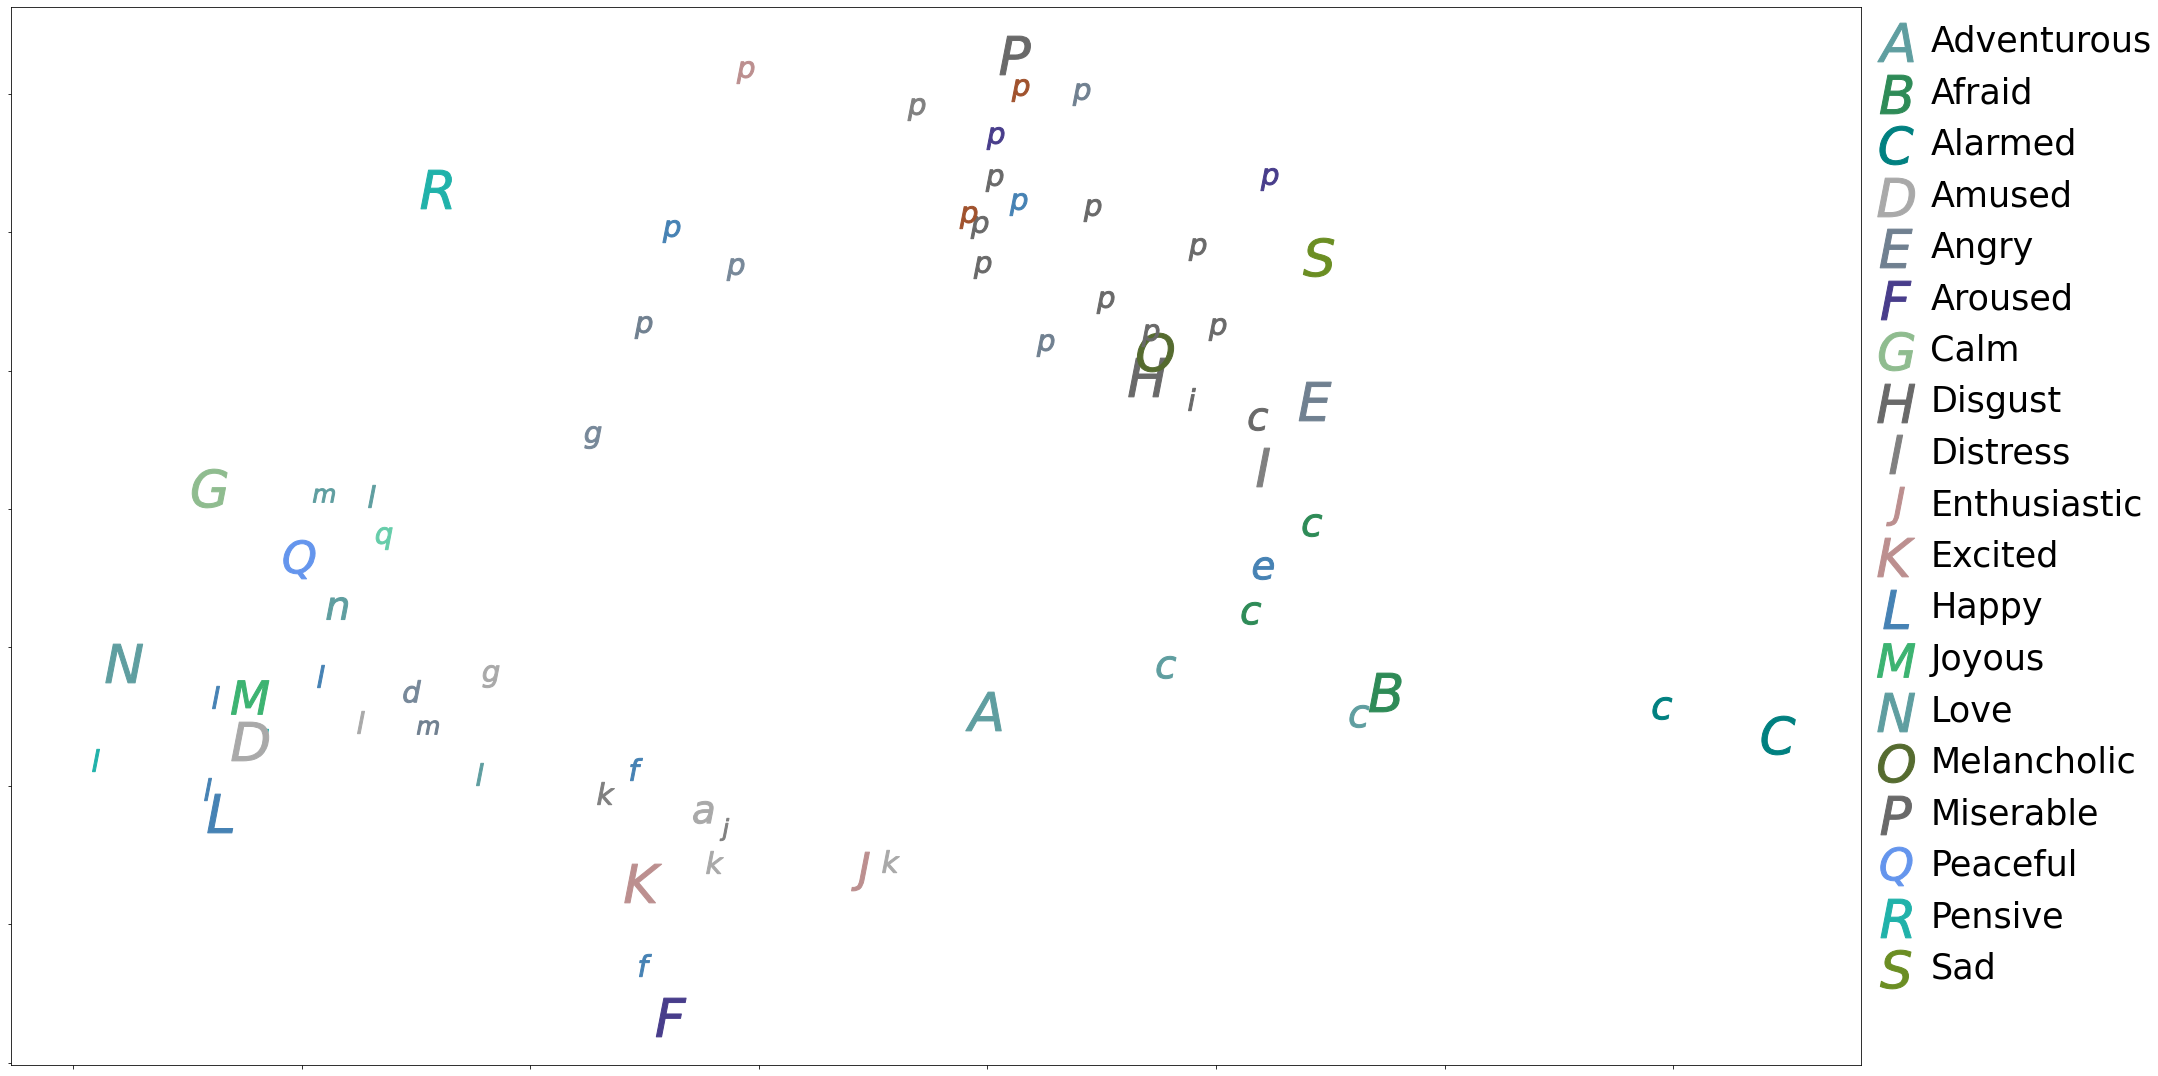

In [ ]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

#plt.figure(figsize=(45,15))
plt.figure(figsize=(30,15))
plt.rcParams['font.size']=35
perplexities = np.arange(10, 80, 5)#[65]#, 35, 40, 45]
n_iterArr = np.arange(1000, 6000, 1000)
n_compArr = np.arange(1, 4, 1)

perplexities = [65]
n_iterArr = [1000] #np.arange(1000, 6000, 1000)
n_compArr = [2]

nRows = 1
nCols = 2
#gs = gridspec.GridSpec(nRows, nCols, width_ratios=np.ones(nCols), hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)
gs = gridspec.GridSpec(nRows, nCols, width_ratios=[10, 1], hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)

n_samples = len(newDimData)
DivergenceDataFrame = pd.DataFrame(0, index=np.arange(0, 280), columns=['n_comp', 'n_iter', 'perplex', 'kl_diverg'])
indexCount = 0

print(newDimData[colmsAre[:-1]])
print('-----------------------------------------')

for n_components in n_compArr:
    for n_iter_ in n_iterArr:
        for i, perplexity in enumerate(perplexities):
            #print('========== New Perplexity = %s ===========' %str(perplexity))
            ax=plt.subplot(gs[0, i])
            t0 = time()
            tsne = manifold.TSNE(n_components=n_components, init='random',n_iter=n_iter_,
                                random_state=0, perplexity=perplexity)
            attributes = tsne.fit(newDimData[colmsAre[:-1]])
            print(f' The kl_divergence value is : {attributes.kl_divergence_}')
            DivergenceDataFrame.loc[indexCount, 'n_comp'] = n_components
            DivergenceDataFrame.loc[indexCount, 'n_iter'] = n_iter_
            DivergenceDataFrame.loc[indexCount, 'perplex'] = perplexity
            DivergenceDataFrame.loc[indexCount, 'kl_diverg'] = np.round(attributes.kl_divergence_, 2)

            indexCount = indexCount + 1            
            Y = tsne.fit_transform(newDimData[colmsAre[:-1]])
            #print(Y)
            t1 = time()
            print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
            #ax.set_title("Perplexity=%d" % perplexity)
            #ax.scatter(Y[:, 0], Y[:, 1], c=newDimData['Color'].values, marker=newDimData['marker'].values, s=500)    

            texts = []
            colorStr = []
            for allInd in np.arange(len(Y)):
                if allInd not in max_.keys():
                    ax.scatter(Y[allInd, 0], Y[allInd, 1], c=newDimData['Color'][allInd], marker=newDimData['marker'][allInd], s=500)    
                else:
                    newMark = '$%s$' %newDimData['marker'][allInd].split('$')[1].upper()
                    ax.scatter(Y[allInd, 0], Y[allInd, 1], c=newDimData['Color'][allInd], marker=newMark, s=1500, label=max_[allInd])  
                    colorStr.extend([newDimData['Color'][allInd]])

            #adjust_text(texts, precision=0.001, lim=1000, force_text=(0.5, 0.25), expand_points=(5,5), ha='center', text_from_text=False, text_from_points=False, only_move={'texts':'xy'}, arrowprops=dict(arrowstyle="->", color=color, lw=1.5))#, only_move={'points':'y', 'texts':'y'})#, arrowprops=dict(arrowstyle=" ", color='black', lw=0.5))
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())            
            #ax2=plt.subplot(gs[0, 1])
            ax.legend(bbox_to_anchor=(0.99, 1), handletextpad=0.01, borderpad=0, framealpha=0)            
            handles, labels = ax.get_legend_handles_labels()
            # sort both labels and handles by labels
            labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))            
            ax.legend(handles, labels, bbox_to_anchor=(0.99, 1), handletextpad=0.01, borderpad=0, framealpha=0)

        plt.savefig('/content/drive/MyDrive/BRM/t-SNE.png')
        plt.savefig('/content/drive/MyDrive/BRM/t-SNE.pdf') 

print(DivergenceDataFrame)                

In [ ]:
# Author: Narine Kokhlikyan <narine@slice.com>
# License: BSD

#plt.figure(figsize=(45,15))
plt.figure(figsize=(30,15))
plt.rcParams['font.size']=35
perplexities = np.arange(10, 80, 5)#[65]#, 35, 40, 45]
n_iterArr = np.arange(1000, 6000, 1000)
n_compArr = np.arange(1, 4, 1)

perplexities = [65]
n_iterArr = [1000] #np.arange(1000, 6000, 1000)
n_compArr = [2]

nRows = 1
nCols = 2
#gs = gridspec.GridSpec(nRows, nCols, width_ratios=np.ones(nCols), hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)
gs = gridspec.GridSpec(nRows, nCols, width_ratios=[10, 1], hspace=0.1, wspace=0.08, left=0.01, right=0.99, bottom=0.01, top=0.99)

print(newDimData)
n_samples = len(newDimData)
n_components = 3

indexes = {}
for color in np.unique(newDimData['Color']):
    indexes[color] = np.where(newDimData['Color'] == color)[0]

for color in np.unique(newDimData['marker']):
    indexes[color] = np.where(newDimData['Color'] == color)[0]

#[print(len(indexes[key_])) for key_ in indexes]
#print(len(indexes))
print(indexes)

DivergenceDataFrame = pd.DataFrame(0, index=np.arange(0, 280), columns=['n_comp', 'n_iter', 'perplex', 'kl_diverg'])
indexCount = 0

for n_components in n_compArr:
    for n_iter_ in n_iterArr:
        for i, perplexity in enumerate(perplexities):
            #print('========== New Perplexity = %s ===========' %str(perplexity))
            ax=plt.subplot(gs[0, i])
            t0 = time()
            tsne = manifold.TSNE(n_components=n_components, init='random',n_iter=n_iter_,
                                random_state=0, perplexity=perplexity)
            attributes = tsne.fit(newDimData[colmsAre[:-1]])
            print(f' The kl_divergence value is : {attributes.kl_divergence_}')
            DivergenceDataFrame.loc[indexCount, 'n_comp'] = n_components
            DivergenceDataFrame.loc[indexCount, 'n_iter'] = n_iter_
            DivergenceDataFrame.loc[indexCount, 'perplex'] = perplexity
            DivergenceDataFrame.loc[indexCount, 'kl_diverg'] = np.round(attributes.kl_divergence_, 2)

            indexCount = indexCount + 1
            Y = tsne.fit_transform(newDimData[colmsAre[:-1]])
            #print(Y)
            t1 = time()
            print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
            #ax.set_title("Perplexity=%d" % perplexity)
            ax.scatter(Y[:, 0], Y[:, 1], c=color, marker=newDimData['marker'], s=500)    

            texts = []
            for idxKey in max_:
                newMark = '$%s$' %newDimData['marker'][idxKey].split('$')[1].upper()
                ax.scatter(Y[idxKey, 0], Y[idxKey, 1], c=color, marker=newMark, s=1500, label=max_[idxKey])    

            for color in indexes:            ## Some problem in here. I think it should not be according to color

                #print(np.unique(newDimData['marker'][indexes[color]]))
                #print(color)
                #print('------------ New Emotion Values %s --------------')
                #print(newDimData['target'][indexes[color]].values)
                for idx in indexes[color]:
                    #ax.scatter(Y[indexes[color], 0], Y[indexes[color], 1], c=[color],marker=newDimData['marker'][indexes[color]].values,s=200)

                    #if n_components == 1:
                    #    ax.scatter(Y[idx, 0], 0, c=color,marker=newDimData['marker'][idx],s=700)                                    

                    try:
                        print(max_[idx])
                        newMark = '$%s$' %newDimData['marker'][idx].split('$')[1].upper()
                        ax.scatter(Y[idx, 0], Y[idx, 1], c=color, marker=newMark, s=1500, label=max_[idx])    
                    except:
                        ax.scatter(Y[idx, 0], Y[idx, 1], c=color,marker=newDimData['marker'][idx],s=500)    

                    '''try: 
                        #if max_[idx] == 'Adventurous':
                        #    pdb.set_trace()                        
                        texts.append(plt.text(Y[idx, 0], Y[idx, 1], max_[idx], fontsize=30, color=color, fontweight='bold'))
                        #for v, a, emt in summary_data_frame.loc[selectedForScatter, ['V_mean', 'A_mean','MostRated']].values:                    
                        #    texts.append(plt.text(v, a, emt, fontsize=35))
                        #ax.annotate(max_[idx], (Y[idx, 0], Y[idx, 1]), fontsize=15)  
                        #newDimData['marker'][idx]='$'+newDimData['marker'][idx].split('$')[1]+'-'+max_[idx]+'$'
                    except:
                        #texts.append(plt.text(Y[idx, 0], Y[idx, 1], " ", fontsize=30, color=color, fontweight='bold'))
                        continue
                        #print(' ')'''
            
            #adjust_text(texts, precision=0.001, lim=1000, force_text=(0.5, 0.25), expand_points=(5,5), ha='center', text_from_text=False, text_from_points=False, only_move={'texts':'xy'}, arrowprops=dict(arrowstyle="->", color=color, lw=1.5))#, only_move={'points':'y', 'texts':'y'})#, arrowprops=dict(arrowstyle=" ", color='black', lw=0.5))
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_major_formatter(NullFormatter())            
            #ax2=plt.subplot(gs[0, 1])
            ax.legend(bbox_to_anchor=(0.99, 1), handletextpad=0.01, borderpad=0, framealpha=0)            
            handles, labels = ax.get_legend_handles_labels()
            # sort both labels and handles by labels
            labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
            ax.legend(handles, labels, labelcolor=colorStr)            

        plt.savefig('/content/drive/MyDrive/BRM/t-SNE.png')
        plt.savefig('/content/drive/MyDrive/BRM/t-SNE.pdf') 

print(DivergenceDataFrame)

In [ ]:
print(DivergenceDataFrame)
DivergenceDataFrame.to_csv('/content/drive/MyDrive/BRM/DivergenceDataFrame.csv')
import os
print(os.getcwd())

     n_comp  n_iter  perplex  kl_diverg
0         1    1000       10       5.67
1         1    1000       15       7.43
2         1    1000       20       6.73
3         1    1000       25       4.67
4         1    1000       30       6.63
..      ...     ...      ...        ...
275       0       0        0       0.00
276       0       0        0       0.00
277       0       0        0       0.00
278       0       0        0       0.00
279       0       0        0       0.00

[280 rows x 4 columns]
/content
